# Red Neuronal

Tutorial de creación de una red neuronal por Alba Reinders Sánchez y Alejandro Valverde Mahou siguiendo el tutorial de  [Dot CSV](https://www.youtube.com/watch?v=W8AeOXa_FqU&list=PL-Ogd76BhmcCO4VeOlIH93BMT5A_kKAXp&index=4)

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

## Problema a resolver

El problema consiste en una clasificación donde los datos están distribuidos de forma circular

### Crear el DATASET

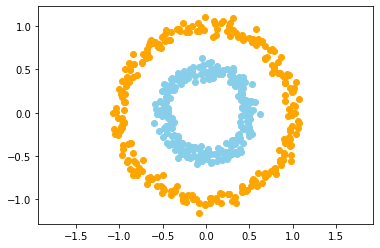

In [2]:
n = 500 #número de registros de los datos
p = 2 #número de características de cada dato

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05) #factor es la distancia entre los círculos

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c = "orange")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c = "skyblue")
plt.axis("equal")
plt.show()

### Crear una clase para las capas

Recibirá por parámetro:

1. *n_conn*: el número de conexiones de la capa
2. *n_neur*: número de neuronas de la capa
3. *act_f*: función de activación de la capa

In [3]:
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur) * 2 -1 #valor aleatorio entre -1 y 1
        self.W = np.random.rand(n_conn, n_neur) * 2 -1 #valor aleatorio entre -1 y 1

### Crear funciones de activación

**Función Sigmoide**: $\frac{1}{1+e^{-x}}$

***Función derivada de Sigmide***: $\frac{1}{1-x}$

**Función RELU**: $\max(0, x)$

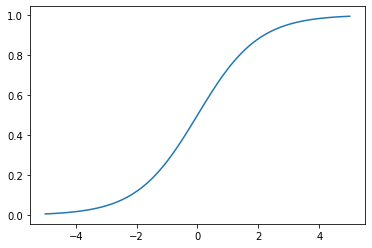

In [4]:
#Función sigmoide

sigm = (lambda x: 1 / (1 + np.e ** (-x)), 
        lambda x: x * (1-x))

_x = np.linspace(-5, 5, 100)

plt.plot(_x, sigm[0](_x))
plt.show()

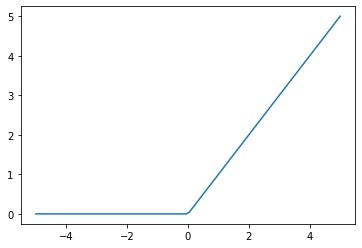

In [5]:
#Función RELU

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)

plt.plot(_x, relu(_x))
plt.show()

## Crear la Red Neuronal

Compuesta de las distintas **capas**

In [6]:
#capa 0
#l0 = neural_layer(p, 4, sigm)
#capa 1
#l1 = neural_layer(4, 8, sigm)        

In [7]:
def create_nn(topology, act_f):
    
    #Estructura de datos para las capas de la red de neuronas
    #Está compuesta por objetos de la clase 'neural_layer'
    nn = []
    
    #En 'l' se guarda el índice y en 'layer' el valor de 'topology'
    #correspondiente 
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
        
    return nn


In [8]:
#Topología de la red de neuronas, número de neuronas por capa
topology = [p, 4, 8, 16, 8, 4, 1]      
neural_net = create_nn(topology, sigm)

### Crear la lógica de la red neuronal

Entrenamiento de la red neuronal, consistente en 3 pasos:
1. Procesamiento hacia delante por todas las capas hasta llegar al final y devolver un valor, inicialmente aleatorio en la neurona final.<br><br>
2. Una vez tiene el resultado, compara con el resultado real o esperado, haciendo uso de la función de coste, y devuelve el error generado para hacer *backpropagation*, una propagación hacia atrás para calcular las derivadas parciales que permite obtener la información necesaria para ejecutar el algoritmo del **Descenso de Gradiente**.<br>

**Fórmula de cómputo de error en la última capa**: $\delta^L = \frac{\partial C}{\partial a^L} \cdot \frac{\partial a^L}{\partial z^L}$

**Fórmula de cómputo de error en el resto de capas**: $\delta ^{l-1} = W^l\delta ^l \cdot \frac{\partial a^{l-1}}{\partial z^{l-1}}$
<br>


3. El **Descenso de Gradiente** permite optimizar la función de coste y *entrenar* la neurona.

**Fórmula de las derivadas de la capa usando el error**: $\frac{\partial C}{\partial b^{l-1}} = \delta ^{l-1} \quad \frac{\partial C}{\partial w^{l-1}} = \delta ^{l-1}a^{l-1}$


#### Error Cuadrático Medio

$\frac{\displaystyle\sum_{i = 1}^{n}{(Yp_i - Yr_i)^2}}{n}$

#### Derivada del Error Cuadrático Medio

$Yp - Yr$

In [9]:
#Función de coste con el error cuadrático medio
#'Yp' -> 'Y' predicha
#'Yr' -> 'Y' real
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))
           

In [10]:
#Recibe por parámetro la red neuronal, los valores de entrada, la salida real,
#la función de coste y el ratio de aprendizaje
#Esta función es la encargada de hacer que la red de neuronas 'aprenda'
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    
    #'Forward pass' Paso 1
    
    out = [(None, X)]
    
    for l, layer in enumerate(neural_net):

        #Calcular la suma ponderada de la capa
        #'@' hace referencia a la multiplicación matricial
        #'[-1]' hace referencia al último elemento del array en todo momento
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b

        #Salida de la capa
        a = neural_net[l].act_f[0](z)
        
        #Guardar la información del procesamiento de la capa
        out.append((z, a))
        
    if train:
        pass
        #Entrenamiento:
        #'Backward pass' Paso 2 - 'Back-propagation'
        
        #'delta' hace referencia a las derivadas parciales de cada capas
        #'deltas' es el array con todas las derivadas parciales
        deltas = []
        
        #Recorrer las capas de la red en orden inverso (empezando por el final)
        
        for l in reversed(range(0, len(neural_net))):
            
            #Coger la suma ponderada de la capa y su salida correspondiente
            z = out[l+1][0]
            a = out[l+1][1]
        
            #Última capa
            if l == len(neural_net) - 1:
                #Calcular delta de la última capa
                
                #Queremos insertar cada capa delante de la anterior, por eso se
                #insertan siempre en la posición 0, de forma que la última capa
                #insertada aparezca la primera
                
                #Fórmula de cómputo de error en la última capa
                
                #se calcula la derivada de la función de coste aportando la
                #salida de la capa y el resultado real y se multiplica por la
                #derivada de la función de activación  a la que se le pasa
                #la salida de la capa
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
                
            else:
                #Calcular delta respecto a la capa previa
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
             
            _W = neural_net[l].W
        
            #'Gradient descent' paso 3

            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
    
    return out[-1][1]

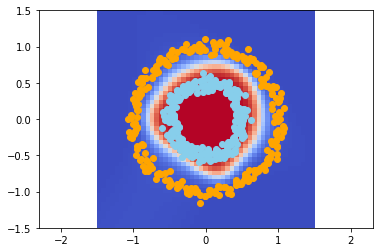

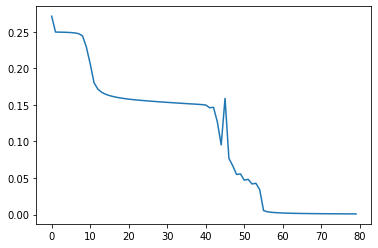

In [11]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

topology = [p, 4, 8, 1]  

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2000):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="orange")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="skyblue")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)